# Hackathon 3
# Group 16

## Load and view the simulated data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!mkdir Hack3 # No need to run for recompile the code

mkdir: cannot create directory ‘Hack3’: File exists


In [4]:
cd Hack3/

/content/drive/MyDrive/Colab Notebooks/Hack3


In [5]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Hack3


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# No need to run since all are saved in my google drive
import requests

print("Downloading files off google drive...")

f_prefix = "gauss"

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=1N1wVk5C64p2fy7kxx7fGpvQA8--Bq38W",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1__SGeKUwQCXLZa83-nKH1Twhh99Lu7tb",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1kRYLhoi1ClSKQbKBnp9asI5_hOoST_Hd",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=1IWaUbkaLh4XbK8CWrx-VZ78RteKBcwVj",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=18N_p6aCJJp_xoYkws5vFX_-mOxqZDkaG",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# now repeat, but for RKKY type function

f_prefix = "RKKY"    

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=1wF0rJB-JpSYohH8MEV-a4E-uw5R5Dxd4",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1bagiHH3-bGAbQIpZalBSPWxg4AAczfpP",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1PvgRwdlJaDpsqElyU8oebfoaV2t13w35",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=10Cd91DR4qzFCqWonkjvJ9ZhhHphJOi7q",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1Wrab6Dk9IgRKPuzeEUiB-C5xEiVoFynr",allow_redirects=True)
open(M_file_i, "wb").write(r.content)    
    
    
print("Done with file downloads")

Done with file downloads


### Change the following "f_prefix" variable to select a different model to load and train on


In [7]:
#f_prefix = "gauss"; # Gaussian functional between nuclei
f_prefix = "RKKY"; # RKKY functional between nuclei

### Now load the data and format it correctly

In [8]:
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

print("Loading into numpy arrays...")
# settings of each simulated material:
# format:  |   α  |   ξ  |   d  |
mat_info = np.loadtxt(mat_file, comments="#", delimiter=None, unpack=False);

# M(t) curve for each simulation, model:
M_r = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M = M_r + 1j*M_i;

# M(t) curve for each simulation, eval:
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

M_r_eval = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i_eval = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M_eval = M_r_eval + 1j*M_i_eval;

print("Done with numpy loads")

Loading into numpy arrays...
Done with numpy loads


### View the data with three plots, two with a specific curve and one with a lot of curves

In [9]:
M.shape # 6000 different curves and 471 points in each curve? 

(6000, 471)

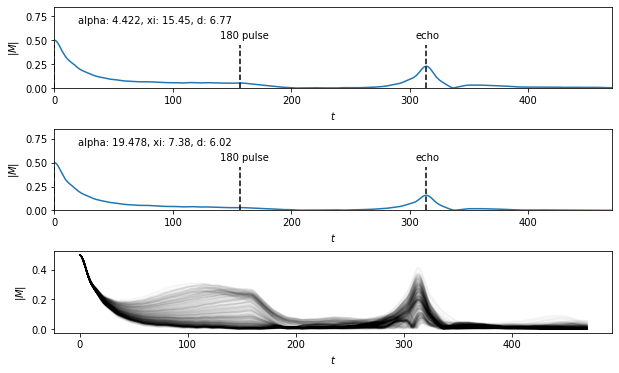

In [ ]:
fig1, ax1 = plt.subplots(3,1, figsize=(10,6));

# change the following to see different curves
plot_idx1 = 0; # weak spin-spin coupling
plot_idx2 = 10; # strong spin-spin coupling

# string format for material parameter plotting
mat_format = "alpha: %.3f, xi: %.2f, d: %.2f";

# view the selected curve, with a label of the material data
ax1[0].plot(abs(M[plot_idx1,:]));
ax1[0].text(20,0.68, mat_format % tuple(mat_info[plot_idx1,:]) );
ax1[0].plot([0, 0],[0, .45],'--k')
ax1[0].plot([157, 157],[0, .45],'--k')
ax1[0].text(140,0.52,"180 pulse")
ax1[0].text(305,0.52,"echo")
ax1[0].plot([2*157, 2*157],[0, .45],'--k')
ax1[0].axis([0, 471, 0, 0.85])
ax1[0].set(ylabel="$|M|$", xlabel="$t$");

# view the selected curve, with a label of the material data
ax1[1].plot(abs(M[plot_idx2,:]));
ax1[1].text(20,0.68, mat_format % tuple(mat_info[plot_idx2,:]) );
ax1[1].plot([0, 0],[0, .45],'--k')
ax1[1].plot([157, 157],[0, .45],'--k')
ax1[1].text(140,0.52,"180 pulse")
ax1[1].text(305,0.52,"echo")
ax1[1].plot([2*157, 2*157],[0, .45],'--k')
ax1[1].axis([0, 471, 0, 0.85])
ax1[1].set(ylabel="$|M|$", xlabel="$t$");

ax1[2].plot(abs(M[1:500,:]).T,color=(0,0,0,.025));
ax1[2].set(ylabel="$|M|$", xlabel="$t$");

fig1.subplots_adjust(hspace=.5)

### Truncate, scale, and partition the training/testing sets

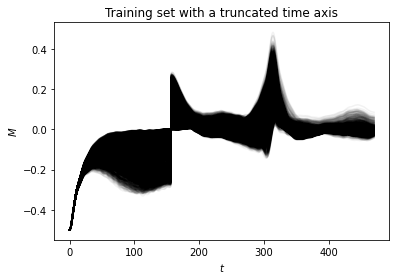

In [10]:
# number of M(t) curves
N_data = np.shape(M)[0]
# truncate time points
# !!! NOTE: May want to use all of the curve, takes longer to train though !!!
#time_keep = range(210,410) # centered roughly at the echo
time_keep = range(0,471)
M_trunc = M[:,time_keep]
# split into real and imaginary
#M_trunc_uncomplex = np.concatenate((np.real(M_trunc), np.imag(M_trunc)),axis=1)
#taking only the imaginry part only
M_trunc_imaginary = np.imag(M_trunc)
# rescale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

mat_info_scaled = sc.fit_transform(mat_info);

# partition data into a training and testing set using a random partition
from sklearn.model_selection import train_test_split
M_train, M_test, mat_train, mat_test = train_test_split(M_trunc_imaginary, mat_info_scaled, test_size=0.1)

# plot the fist 500 elements of the training set, for visualizing variations in the data
plt.plot((M_train[:,:]).T,color=(0,0,0,.05));
plt.xlabel("$t$")
plt.ylabel("$M$")
plt.title("Training set with a truncated time axis");

# RKKY Model

In [76]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import SGD # gradient descent optimizer
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import reciprocal
import math

In [81]:
def calculate_layer_nodes(n_layers, first_layer_nodes, last_layer_nodes):
  nodes_in_layers=[]
  nodes_difference = (first_layer_nodes-last_layer_nodes)/(n_layers-1)
  nodes_ = first_layer_nodes
  for i in range(n_layers):
    nodes_in_layers.append(math.ceil(nodes_))
    nodes_=nodes_ - nodes_difference
  return nodes_in_layers


In [82]:
def create_model(n_layers=4, first_layer_nodes=100, last_layer_nodes=3, activation='relu', 
                loss='mean_squared_error', kernel_initializer='he_normal'):
  nodes_in_layers = calculate_layer_nodes(n_layers, first_layer_nodes, last_layer_nodes)
  nn = Sequential()
  for i in range(n_layers-1):
    if i==0:
      nn.add(Dense(first_layer_nodes,input_dim=M_train.shape[1], activation=activation, kernel_initializer=kernel_initializer))
      nn.add(BatchNormalization())
    else:
      nn.add(Dense(nodes_in_layers[i], activation=activation, kernel_initializer=kernel_initializer))
      nn.add(BatchNormalization()) 
  nn.add(Dense(last_layer_nodes,activation='linear')) #relu or softplus will do too
  nn.compile(loss=loss, optimizer=SGD(lr=0.01, momentum = 0.95) )
  return nn 

In [83]:
model = KerasRegressor(build_fn=create_model)
param_grid = {"n_layers" : [2,3,4,5], "first_layer_nodes" : [100,200,300,400],
    "activation" : ['relu','selu','elu','gelu','exponential','softplus'],
    "kernel_initializer" : ['he_normal','he_uniform','glorot_normal','glorot_uniform','lecun_normal','lecun_uniform'],
    "loss" : ['mean_squared_error','mean_absolute_error','huber_loss'],
    "batch_size" : [32,64,96,128]}
grid = RandomizedSearchCV(model, param_distributions=param_grid, cv=3, n_iter=100)

In [84]:
#call backs set up
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=10)
callbacks = [early_stopping_cb,lr_scheduler]

In [17]:
#train the grid
history = grid.fit(M_train, mat_train, epochs=500,  verbose=2, callbacks=callbacks, validation_split=0.2)

Streaming output truncated to the last 5000 lines.
Epoch 22/500
45/45 - 0s - loss: 0.2494 - val_loss: 0.2745
Epoch 23/500
45/45 - 0s - loss: 0.2517 - val_loss: 0.2643
Epoch 24/500
45/45 - 0s - loss: 0.2484 - val_loss: 0.2668
Epoch 25/500
45/45 - 0s - loss: 0.2530 - val_loss: 0.3085
Epoch 26/500
45/45 - 0s - loss: 0.2513 - val_loss: 0.2789
Epoch 27/500
45/45 - 0s - loss: 0.2536 - val_loss: 0.2813
Epoch 28/500
45/45 - 0s - loss: 0.2497 - val_loss: 0.2941
Epoch 29/500
45/45 - 0s - loss: 0.2491 - val_loss: 0.2831
Epoch 30/500
45/45 - 0s - loss: 0.2450 - val_loss: 0.2650
Epoch 31/500
45/45 - 0s - loss: 0.2465 - val_loss: 0.2679
Epoch 32/500
45/45 - 0s - loss: 0.2448 - val_loss: 0.2791
Epoch 33/500
45/45 - 0s - loss: 0.2507 - val_loss: 0.2676
Epoch 34/500
45/45 - 0s - loss: 0.2469 - val_loss: 0.2629
Epoch 35/500
45/45 - 0s - loss: 0.2427 - val_loss: 0.2773
Epoch 36/500
45/45 - 0s - loss: 0.2427 - val_loss: 0.2572
Epoch 37/500
45/45 - 0s - loss: 0.2439 - val_loss: 0.2565
Epoch 38/500
45/45 - 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: object of type 'NoneType' has no len()

  FitFailedWarning)


Streaming output truncated to the last 5000 lines.
45/45 - 0s - loss: 0.4974 - val_loss: 0.5193
Epoch 119/500
45/45 - 0s - loss: 0.4979 - val_loss: 0.5540
Epoch 120/500
45/45 - 0s - loss: 0.4997 - val_loss: 0.5045
Epoch 121/500
45/45 - 0s - loss: 0.5079 - val_loss: 0.5404
Epoch 122/500
45/45 - 0s - loss: 0.5172 - val_loss: 0.4757
Epoch 123/500
45/45 - 0s - loss: 0.4976 - val_loss: 0.5268
Epoch 124/500
45/45 - 0s - loss: 0.4955 - val_loss: 0.5199
Epoch 125/500
45/45 - 0s - loss: 0.4995 - val_loss: 0.4708
Epoch 126/500
45/45 - 0s - loss: 0.4999 - val_loss: 0.4616
Epoch 127/500
45/45 - 0s - loss: 0.5015 - val_loss: 0.5116
Epoch 128/500
45/45 - 0s - loss: 0.5084 - val_loss: 0.4695
Epoch 129/500
45/45 - 0s - loss: 0.5010 - val_loss: 0.5514
Epoch 130/500
45/45 - 0s - loss: 0.4936 - val_loss: 0.5746
Epoch 131/500
45/45 - 0s - loss: 0.5066 - val_loss: 0.5508
Epoch 132/500
45/45 - 0s - loss: 0.5046 - val_loss: 0.4885
Epoch 133/500
45/45 - 0s - loss: 0.5010 - val_loss: 0.4869
Epoch 134/500
45/45

In [18]:
grid.best_score_

-0.04847385982672373

In [19]:
grid.best_params_

{'activation': 'relu',
 'batch_size': 64,
 'drop_rate': 0.2,
 'first_layer_nodes': 400,
 'kernel_initializer': 'lecun_uniform',
 'loss': 'huber_loss',
 'n_layers': 5}

In [20]:
grid.cv_results_

{'mean_fit_time': array([20.90176694, 19.56017176, 28.88410862,  6.66142201,  5.54953631,
        21.36950572,  2.42163467, 29.20839024, 18.64604497, 26.8958025 ,
        13.01490712, 14.64575632,  3.59708714,  4.61369999, 25.41868711,
        17.25103649, 12.48350938,  6.47238549, 18.71375871,  3.23890289,
        15.52514116, 40.71325103, 32.31113895,  4.82833521, 18.17243934,
        18.38964065, 16.75281644, 14.53669405, 33.81594086, 11.114772  ,
        16.40676308, 16.10861897, 12.7651825 , 19.76604557, 10.22625939,
        20.29470984, 15.5234557 , 13.14828809, 20.2634263 , 28.36795751,
        25.43798987, 20.54463323,  7.5583233 , 18.30208635, 11.84153072,
        13.10847481, 30.36471462, 31.04908085, 31.84233467, 21.43049757,
         3.32408126, 18.94468554, 16.66331172, 14.47807097, 24.46811382,
        42.06034835, 16.11956215,  9.34251555, 29.40125219, 20.85311588,
        14.71607963, 19.9498361 , 23.03168972, 35.41043631, 21.18382486,
        42.62276204, 30.10120813, 

In [90]:
nn = create_model(n_layers=5, first_layer_nodes=400, activation='relu', loss='huber_loss', kernel_initializer='lecun_uniform')

In [91]:
history = nn.fit(M_train, mat_train, epochs=500,batch_size=64, verbose=2, callbacks=callbacks, validation_split=0.2)

Epoch 1/500
68/68 - 1s - loss: 0.3199 - val_loss: 0.4217
Epoch 2/500
68/68 - 0s - loss: 0.2608 - val_loss: 0.3649
Epoch 3/500
68/68 - 0s - loss: 0.2466 - val_loss: 0.3453
Epoch 4/500
68/68 - 0s - loss: 0.2451 - val_loss: 0.3349
Epoch 5/500
68/68 - 0s - loss: 0.2249 - val_loss: 0.3112
Epoch 6/500
68/68 - 0s - loss: 0.2114 - val_loss: 0.3694
Epoch 7/500
68/68 - 0s - loss: 0.1938 - val_loss: 0.2615
Epoch 8/500
68/68 - 0s - loss: 0.1752 - val_loss: 0.9245
Epoch 9/500
68/68 - 0s - loss: 0.1718 - val_loss: 0.3050
Epoch 10/500
68/68 - 0s - loss: 0.1641 - val_loss: 1.1172
Epoch 11/500
68/68 - 0s - loss: 0.1636 - val_loss: 0.3176
Epoch 12/500
68/68 - 0s - loss: 0.1323 - val_loss: 0.9410
Epoch 13/500
68/68 - 0s - loss: 0.1492 - val_loss: 0.7801
Epoch 14/500
68/68 - 0s - loss: 0.1350 - val_loss: 0.2420
Epoch 15/500
68/68 - 0s - loss: 0.1411 - val_loss: 0.9640
Epoch 16/500
68/68 - 0s - loss: 0.1323 - val_loss: 0.5179
Epoch 17/500
68/68 - 0s - loss: 0.1194 - val_loss: 0.5442
Epoch 18/500
68/68 - 0s

In [92]:
import pandas as pd

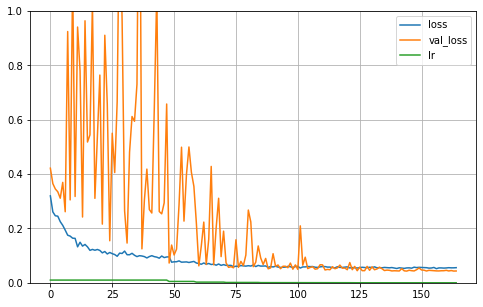

In [93]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

19/19 [==============================] - 0s 1ms/step - loss: 0.0372
test loss: 0.03717200458049774


Text(0.5, 1.0, 'Dissipation strength')

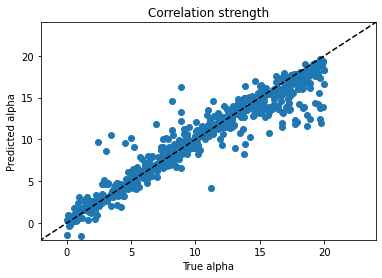

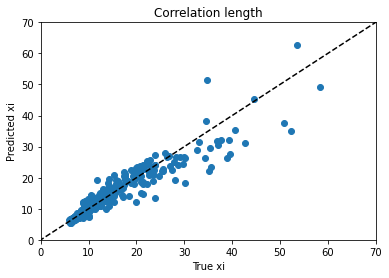

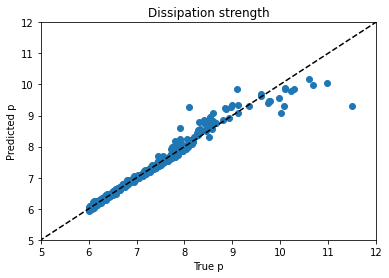

In [94]:
# check results on test set

results = nn.evaluate(M_test,mat_test, batch_size=32);
print("test loss:", results)
nn_test_sc = sc.inverse_transform(nn.predict(M_test));
mat_test_sc = sc.inverse_transform(mat_test);

plt.scatter(mat_test_sc[:,0],nn_test_sc[:,0]);
plt.plot([-100,100],[-100, 100],"--k")
plt.xlabel("True alpha");
plt.ylabel("Predicted alpha");
plt.axis([-2, 24, -2, 24])
plt.title("Correlation strength")

plt.figure()
plt.scatter(mat_test_sc[:,1],nn_test_sc[:,1]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True xi");
plt.ylabel("Predicted xi");
plt.axis([0, 70, 0, 70])
plt.title("Correlation length")

plt.figure()
plt.scatter(mat_test_sc[:,2],nn_test_sc[:,2]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True p");
plt.ylabel("Predicted p");
plt.axis([5, 12, 5, 12])
plt.title("Dissipation strength")




In [95]:
M_eval_imaginary = np.imag(M_eval)
mat_eval = sc.inverse_transform(nn.predict(M_eval_imaginary))
filename = f_prefix + "_mat_info_eval.txt"
np.savetxt(filename,mat_eval,delimiter='\t')

## Heatmap of important features in the time domain

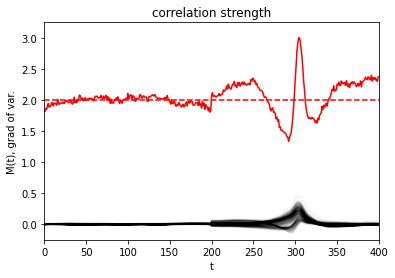

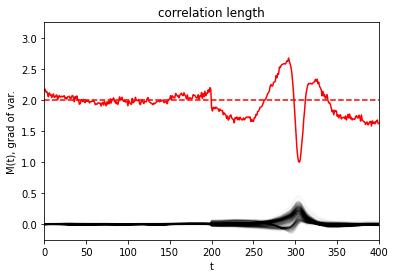

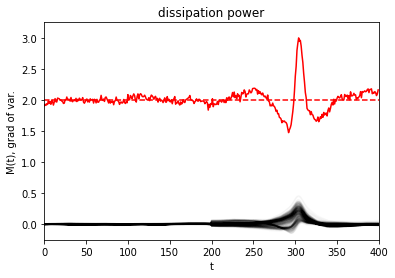

In [ ]:
# heatmap of feature importance in the time domain
from keras import backend as k
import tensorflow as tf

var_names = ["correlation strength", "correlation length", "dissipation power"]

for tar_var in range(3):
    in_tensor = tf.convert_to_tensor(M_test) # we will track gradients w.r.t. M(t)
    with tf.GradientTape() as t:
        t.watch(in_tensor)
        tar_output = tf.gather(nn(in_tensor), tar_var, axis=1) # keep track of the tar_var output

    grads = t.gradient(tar_output, in_tensor).numpy() # comput gradient using tensorflow
    grad_sum = np.sum((grads),axis=0) # sum along all testing curves

    plt.figure()
    plt.plot((M_train[1:500,:]).T,color=(0,0,0,.025))
    plt.plot(2+grad_sum/np.max(np.abs(grad_sum)),'r')
    plt.plot([0, 400],[2, 2],'--r')
    plt.title(var_names[tar_var])
    plt.xlabel('t')
    plt.axis([0, 400, -.25, 3.25])
    plt.ylabel('M(t), grad of var.')
